('C:\\Users\\WELCOME\\OneDrive\\Desktop\\Learning\\Enemble_Learning\\Regression_Dataset',
 ['regression_dataset_1.csv',
  'regression_dataset_2.csv',
  'regression_dataset_3.csv',
  'regression_dataset_4.csv',
  'regression_dataset_5.csv'])

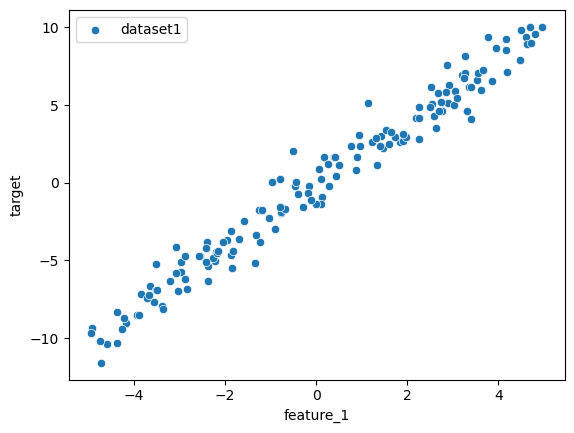

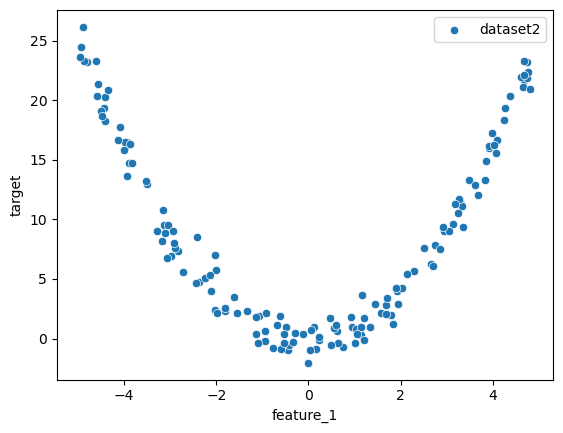

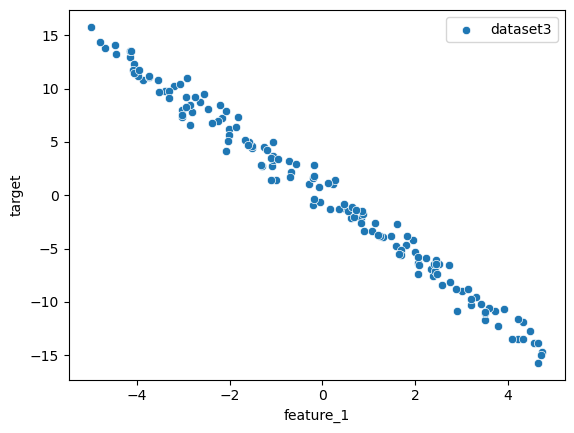

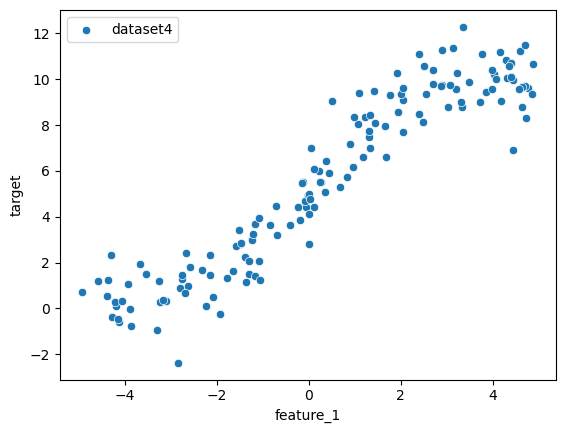

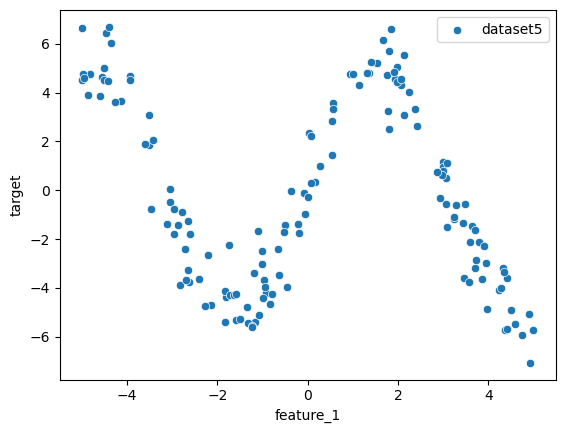

In [9]:
from cProfile import label
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

# Folder to save generated CSV files
folder_path = r'C:\Users\WELCOME\OneDrive\Desktop\Learning\Enemble_Learning\Regression_Dataset'


# Function to generate synthetic regression datasets
def make_regress_csv(filename,pattern, n_samples=100, n_features=2, noise=0.1, random_state=None):
    rng = np.random.default_rng(random_state)
    X = rng.uniform(-5, 5, size=(n_samples, 1))
    
    if pattern == "linear":
        y = 2 * X[:,0] + rng.normal(0, noise, n_samples)
    elif pattern == "u_shape":
        y = X[:,0]**2 + rng.normal(0, noise, n_samples)
    elif pattern == "downward":
        y = -3 * X[:,0] + rng.normal(0, noise, n_samples)
    elif pattern == "sigmoid":
        y = 10 / (1 + np.exp(-X[:,0])) + rng.normal(0, noise, n_samples)
    elif pattern == "sin_wave":
        y = 5 * np.sin(X[:,0]) + rng.normal(0, noise, n_samples)
    
    df = pd.DataFrame(X, columns=["feature_1"])
    df['target'] = y
    df.to_csv(os.path.join(folder_path, filename), index=False)
    return df

# Generate 5 CSV files
p = ["linear","u_shape","downward","sigmoid","sin_wave"]
for p,i in zip(p,range(1, 6)):
    
    df = make_regress_csv(f"regression_dataset_{i}.csv",p, n_samples=150, n_features=1, noise=1.0, random_state=i)
    fig,ax = plt.subplots()
    sns.scatterplot(df,x='feature_1',y='target',label=f'dataset{i}')

folder_path, os.listdir(folder_path)
